# Assignment 3

## Problem 1.  
See attached PDF.

## Problem 2. Simulating your Income.

#### (a)

In [1]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
from random import randint
import pylab 
import scipy.stats as stats

In [2]:
def IncomeSimulate(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'sigma'       : 0.13,       # standard deviation of your income process
        'inc0'        : 80000,      # average initial income
        'rho'         : 0.4,        # the persistence
        'g'           : 0.025,      # the long-run growth rate of income
        'year_start'  : int(2020),  # start year
        'period'      : 40,         # years to work
        'num_draws'   : 10000       # simulations
    }
    """    

    # set random seed
    np.random.seed(524)
    
    # generate errors
    ln_errors = np.random.normal(0, p['sigma'], (p['period'], p['num_draws']))
    
    # create a matrix of dim (lf_years, num_draws)
    ln_inc_mat = np.zeros((p['period'], p['num_draws']))

    #fill the matrix
    ln_inc_mat[0, :] = np.log(p['inc0']) + ln_errors[0, :]
    
    # loop and apply model
    for yr in range(1, p['period']):
        ln_inc_mat[yr, :] = (1 - p['rho']) * (np.log(p['inc0']) + p['g'] * yr) \
        + p['rho'] * ln_inc_mat[yr - 1, :] + ln_errors[yr, :]

    inc_mat = np.exp(ln_inc_mat) # dealing with large numbers so put in terms of 10k's
    return inc_mat
    

In [3]:
simulation_profile = {
        'sigma'       : 0.13,       # standard deviation of your income process
        'inc0'        : 80000,      # average initial income
        'rho'         : 0.4,        # the persistence
        'g'           : 0.025,      # the long-run growth rate of income
        'year_start'  : int(2020),  # start year
        'period'      : 40,         # years to work
        'num_draws'   : 10000       # simulations
}

sim_inc = IncomeSimulate(simulation_profile)
print(sim_inc)

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


Now, after we simulated the income matrix, we are going to plot one of the income paths. 

In [4]:
# Plot one of the income paths at random
np.random.seed(123)
random_income = np.array(sim_inc[:, randint(0, simulation_profile['num_draws'] - 1)])
random_income

array([ 79176.37302043,  81779.65323099,  96362.25149757, 103946.9965005 ,
        92273.24205658,  73238.05454692,  86593.54610353, 100935.8108114 ,
       114279.66730903, 104243.19243207, 102736.96196658,  99789.72394317,
       116889.0829077 , 117009.04738751, 121268.24025042, 135222.18835699,
       135333.95836443, 102225.32858143,  98074.89797281, 108397.47930682,
       129014.64459375,  95061.53295422, 135682.08273827, 139426.08822471,
       161911.46002849, 146572.36751767, 152901.50585761, 161740.0310019 ,
       191265.56786568, 150129.7883697 , 157178.42711608, 165736.79235411,
       187811.33787301, 185644.31213458, 177647.42393792, 175134.0864884 ,
       205355.09154611, 210966.58103084, 228853.31748421, 189600.84825915])

Text(0, 0.5, 'Annual income (\\$s)')

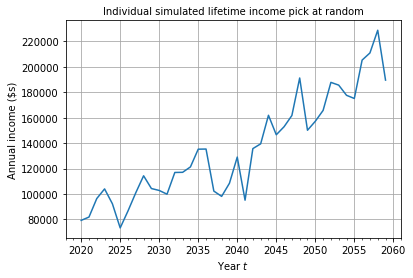

In [5]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['year_start'], p['year_start'] + p['period'])
fig, ax = plt.subplots()
plt.plot(year_vec, random_income)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b = True, which = 'major', color = '0.65', linestyle = '-')
plt.title('Individual simulated lifetime income pick at random', fontsize = 10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

#### (b)

Text(0.5, 1.0, 'Number of Respondents in Income Bins')

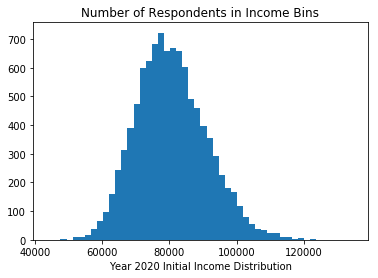

In [6]:
plt.hist(sim_inc[0,:], bins = 50)
plt.xlabel("Year 2020 Initial Income Distribution")
plt.title("Number of Respondents in Income Bins")

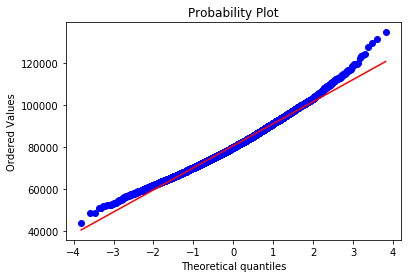

In [7]:
stats.probplot(sim_inc[0,:], dist = "norm", plot = pylab)
pylab.show()

As we can see from the histogram, the distribution is roughly normal, although it is a little bit right skewed (concave up); it is just a minor issue.

Now, calculate the percentage of earn more than \$100,000 in the first year.

In [8]:
# percentage more than 100,000
len(sim_inc[0, :][sim_inc[0, :] > 100000]) / len(sim_inc[0, :])

0.0417

As we can see that 4.17\% of the class will earn more than 100,000\$ in the first year.  

Next, we will calculate the percentage of earn less than \$70,000.

In [9]:
# percentage more than 70,000
len(sim_inc[0, :][sim_inc[0, :] < 70000]) / len(sim_inc[0, :])

0.1512

As we can see that 15.12\% of the class will earn less than 70,000\$ in the first year.  

#### (c)

In [10]:
'''
Find the cumulative sum of 10% of the annual income and calculate 
the number of year to pay the debt
'''
yr_debt = []
for i in range(p['num_draws']):
    cum = np.cumsum(sim_inc[:, i] * 0.1)
    # the true number of years should be the index plus 1
    a = np.where(cum >= 95000)[0][0] + 1 
    yr_debt.append(a)
yr_debt = np.array(yr_debt)
yr_debt

array([11, 11, 10, ..., 12, 11, 11])

In [11]:
# find how many unique number of years in the array
s = set(yr_debt)
s

{9, 10, 11, 12, 13}

Text(0.5, 1.0, 'Histogram of year people complete their debt')

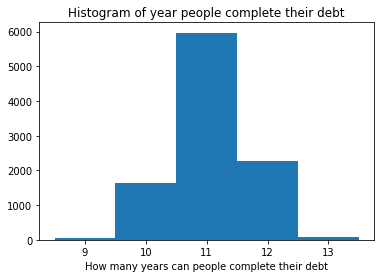

In [12]:
plt.hist(yr_debt, bins = np.arange(min(s) - 0.5, max(s) + 1.5))
plt.xlabel("How many years can people complete their debt")
plt.title("Histogram of year people complete their debt")

Next, we will calculate the percentage of the simulations are able to pay off the loan in 10 years:

In [13]:
# Find percentage
p = len(yr_debt[yr_debt  <= 10]) / len(yr_debt)
p

0.1678

As we can see from the output, 16.78\% of the simulations are able to pay off their debt.

#### (d)

In [14]:
new_sim_profile = {
        'sigma'       : 0.17,       # standard deviation of your income process
        'inc0'        : 90000,      # average initial income
        'rho'         : 0.4,        # the persistence
        'g'           : 0.025,      # the long-run growth rate of income
        'year_start'  : int(2020),  # start year
        'period'      : 40,         # years to work
        'num_draws'   : 10000       # simulations
}

new_sim_inc = IncomeSimulate(new_sim_profile)
print(new_sim_inc)

[[ 70550.46142451 117783.33011091 123561.20729139 ... 118483.24080508
   78992.81966812  73764.25171169]
 [ 89615.63768821  71575.56495871  96317.75493523 ...  72778.88084775
   81644.3347736   90400.57899801]
 [ 82955.30101689  69396.06916251 106035.55593099 ...  70956.3661129
  103848.93176006  89949.09077038]
 ...
 [338309.11761165 252187.52025149 203293.03644369 ... 168361.21927259
  308250.29858492 240024.49205936]
 [271061.07048342 227502.32436192 220836.5697397  ... 223095.32811759
  239983.96514044 231788.44418303]
 [219057.46748997 172865.33333479 183245.71710131 ... 295275.8618388
  273090.00167035 253934.86273481]]


In [15]:
'''
Find the cumulative sum of 10\% of the annual income and calculate 
the number of year to pay the debt
'''
new_yr_debt = []
for i in range(new_sim_profile['num_draws']):
    cum = np.cumsum(new_sim_inc[:, i] * 0.1)
    # the true number of years should be the index plus 1
    a = np.where(cum >= 95000)[0][0] + 1 
    new_yr_debt.append(a)
new_yr_debt = np.array(new_yr_debt)
new_yr_debt

array([10, 10,  9, ..., 11, 10, 10])

In [16]:
# find how many unique number of years in the array
s = set(new_yr_debt)
s

{7, 8, 9, 10, 11, 12, 13}

Text(0.5, 1.0, 'Histogram of year people complete their debt')

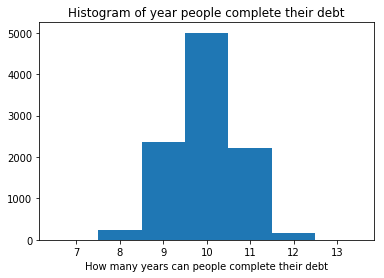

In [17]:
plt.hist(new_yr_debt, bins = np.arange(min(s) - 0.5, max(s) + 1.5))
plt.xlabel("How many years can people complete their debt")
plt.title("Histogram of year people complete their debt")

Next, we will calculate the percentage of the simulations are able to pay off the loan in 10 years:

In [18]:
# Find percentage
p = len(new_yr_debt[new_yr_debt  <= 10]) / len(new_yr_debt)
p

0.7602

As we can see from the output, 76.02\% of the simulations are able to pay off their debt.